
**Introduction to Libraries and Modules:**

In the realm of deep learning and computer vision, a variety of powerful libraries and modules are utilized to facilitate the development, training, and evaluation of models. In this context, TensorFlow and Keras stand out as prominent frameworks, offering a wide range of functionalities for building and deploying deep learning models.

1. **TensorFlow**:
   TensorFlow is an open-source machine learning framework developed by Google. It provides comprehensive tools and resources for building and deploying machine learning and deep learning models across a variety of platforms. With TensorFlow, developers can construct complex neural network architectures, manage datasets, perform training and inference tasks efficiently, and deploy models in production environments.

2. **Keras**:
   Keras is a high-level neural networks API written in Python and integrated into TensorFlow. It offers a user-friendly interface for building and training deep learning models with minimal code. Keras provides a wide range of pre-built layers, activation functions, optimizers, and loss functions, making it easy to construct custom neural network architectures and experiment with different configurations.

**Modules and Libraries:**

- **Dropout**, **Dense**, **Conv2D**, **BatchNormalization**, **MaxPooling2D**, **Flatten**: These are classes imported from the `keras.layers` module. They represent various layers commonly used in deep learning models, such as dropout layers for regularization, dense layers for fully connected networks, convolutional layers for feature extraction, batch normalization layers for normalization, max-pooling layers for downsampling, and flatten layers for reshaping input tensors.

- **Sequential**, **Model**: These are classes imported from the `keras.models` module. They are used to define the architecture of neural network models. `Sequential` is typically used for building sequential models where layers are stacked sequentially, while `Model` is used for constructing more complex models with multiple inputs or outputs.

- **cifar10**: This is a dataset imported from the `keras.datasets` module. It provides access to the CIFAR-10 dataset, a benchmark dataset widely used for image classification tasks. CIFAR-10 consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

- **to_categorical**: This function is imported from the `keras.utils` module. It is used to convert class labels into one-hot encoded vectors, which are commonly used in multi-class classification tasks.

- **EarlyStopping**, **ModelCheckpoint**: These are callback functions imported from the `keras.callbacks` module. They are used during model training to implement early stopping based on validation loss and to save the best model checkpoint during training, respectively.

- **ImageDataGenerator**: This class is imported from the `tensorflow.keras.preprocessing.image` module. It is used for real-time data augmentation during model training, enabling the generation of augmented images on-the-fly to increase the diversity of the training dataset and improve model generalization.

- **numpy**: This is a numerical computing library in Python, widely used for array operations and mathematical computations. It is commonly used in deep learning applications for data manipulation and preprocessing.

- **matplotlib.pyplot**: This is a plotting library in Python, used for visualizing data and training results. It provides functions for creating various types of plots, such as line plots, scatter plots, and histograms.

- **seaborn**: Seaborn is a statistical data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Seaborn complements matplotlib's functionality and provides additional plot types and aesthetic enhancements.

**Performance Evaluation:**

- **Confusion Matrix**: The confusion matrix is a tabular representation of the predicted versus actual class labels. It allows for a detailed analysis of classification performance, including the identification of misclassifications and error patterns.

- **Classification Report**: The classification report provides a summary of various performance metrics, including precision, recall, F1-score, and support, for each class. It offers insights into the model's performance on individual classes and overall classification performance.



In [10]:
# Import necessary libraries

import tensorflow as tf 
from tensorflow import keras 
from keras.layers import Dropout , Dense , Conv2D , BatchNormalization , MaxPooling2D , Flatten
from keras.models import Sequential , Model
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline



Here we preprocesse the data by normalizing pixel values, and print out the shapes of the training and testing data arrays along with their corresponding label arrays. 

In [11]:
# Load CIFAR-10 dataset and split into training and testing sets
(X_train , y_train) , (X_test , y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train , X_test = X_train / 255.0 , X_test / 255.0

# Print shapes of training and testing data arrays along with their labels
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)



Here we define a function plot_images to visualize a grid of images from the CIFAR-10 dataset along with their corresponding labels

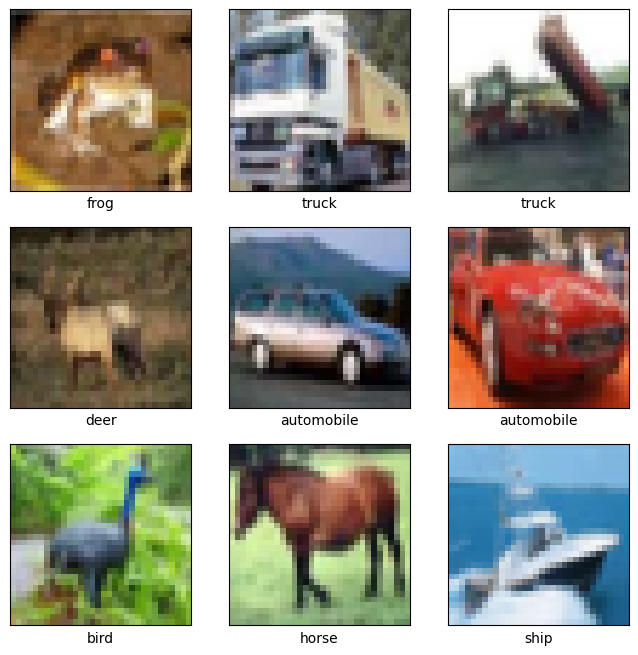

In [12]:
# Define class labels for CIFAR-10 dataset
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define function to plot images
def plot_images(images, labels):
    # Create a figure with a size of 8x8 inches
    plt.figure(figsize=(8, 8))
    
    # Loop through the first 9 images
    for i in range(9):
        # Create a subplot with 3 rows, 3 columns, and index i+1
        plt.subplot(3, 3, i+1)
        
        # Remove ticks from the plot
        plt.xticks([])
        plt.yticks([])
        
        # Disable grid lines
        plt.grid(False)
        
        # Display the image in the subplot
        plt.imshow(images[i])
        
        # Add label to the image based on its corresponding class
        plt.xlabel(classes[labels[i][0]])
    
    # Show the plot
    plt.show()

# Call the function to plot images
plot_images(X_train, y_train)


In [13]:


# One-hot encode target labels
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


In [14]:

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,      # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,  # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically by up to 10% of the height
    horizontal_flip=True,   # Randomly flip images horizontally
    zoom_range=0.1,         # Randomly zoom into images by up to 10%
    fill_mode='nearest'     # Fill in missing pixels using the nearest available pixel
)




In [15]:
# Clear previous session
tf.keras.backend.clear_session()

# Define the model architecture
base_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(), 
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(), 
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.5),  # Adding dropout layer with dropout rate of 0.5
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')  # Using softmax activation for multi-class classification
])

# Define optimizer with specified learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compile the model with categorical_crossentropy loss and the defined optimizer
base_model.compile(loss='categorical_crossentropy',
                   optimizer=optimizer,  # Use the defined optimizer
                   metrics=['accuracy'])

# Print model summary
base_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 359,978 (1.37 MB)

 Trainable params: 359,082 (1.37 MB)

 Non-trainable params: 896 (3.50 KB)

Learning rate scheduling is a technique used in training deep neural networks to adjust the learning rate dynamically throughout the training process. It balances rapid convergence in the early stages with fine-tuning in later stages. By lowering the learning rate gradually, it helps prevent overshooting and oscillations, leading to stable and accurate convergence. Different strategies, such as step decay and exponential decay, can be employed based on the dataset and model characteristics. Experimentation and validation are crucial for selecting the most effective scheduling strategy. Overall, learning rate scheduling optimizes the learning process, enhancing model performance and convergence.

In [16]:
def lr_schedule(epoch):
    """
    Learning rate scheduler function to adjust learning rate during training.

    Args:
        epoch (int): The current epoch number.

    Returns:
        float: The learning rate for the current epoch.
    """
    # Initial learning rate
    learning_rate = 1e-3
    
    # Reduce learning rate by a factor of 10 at specific epochs
    if epoch >= 40:
        learning_rate *= 1e-1  # Reduce learning rate by a factor of 10 at epoch 40
    elif epoch >= 30:
        learning_rate *= 1e-1  # Reduce learning rate by a factor of 10 at epoch 30
    elif epoch >= 20:
        learning_rate *= 1e-1  # Reduce learning rate by a factor of 10 at epoch 20
    
    return learning_rate


these callbacks enable dynamic learning rate adjustment and automated model saving, enhancing the training process and ensuring that the best model is retained for future use.

In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint

# Define a callback for learning rate scheduling
lr_callback = LearningRateScheduler(lr_schedule)

# Create callbacks including the learning rate scheduler
callbacks = [
    ModelCheckpoint("best_model.keras", save_best_only=True),  # Save the best model during training
    lr_callback  # Learning rate scheduler
]


In [18]:

# Train the model with data augmentation
history = base_model.fit(
    datagen.flow(X_train, y_train_encoded, batch_size=32),
    epochs=60,
    validation_data = (X_test , y_test_encoded),
    callbacks=callbacks,
    verbose=1
)



Epoch 1/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 141ms/step - accuracy: 0.3647 - loss: 1.7648 - val_accuracy: 0.4531 - val_loss: 1.6425 - learning_rate: 0.0010
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.5582 - loss: 1.2477 - val_accuracy: 0.6490 - val_loss: 0.9916 - learning_rate: 0.0010
Epoch 3/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 238s 152ms/step - accuracy: 0.6312 - loss: 1.0643 - val_accuracy: 0.6438 - val_loss: 1.0811 - learning_rate: 0.0010
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 228s 146ms/step - accuracy: 0.6582 - loss: 0.9904 - val_accuracy: 0.7166 - val_loss: 0.8477 - learning_rate: 0.0010
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 133ms/step - accuracy: 0.6915 - loss: 0.9031 - val_accuracy: 0.7188 - val_loss: 0.8240 - learning_rate: 0.0010
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 126ms/step - accuracy: 0.7103 - loss: 0.8442 - val_accuracy: 0.7388 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 173s 111ms

In [19]:


# Evaluate the model on the test data
loss, accuracy = base_model.evaluate(X_test, y_test_encoded)

# Print the evaluation results
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8482 - loss: 0.4424
Test Loss: 0.4472503364086151
Test Accuracy: 0.8500000238418579


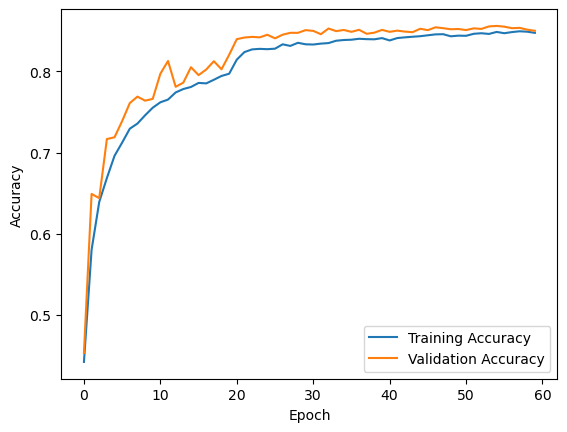

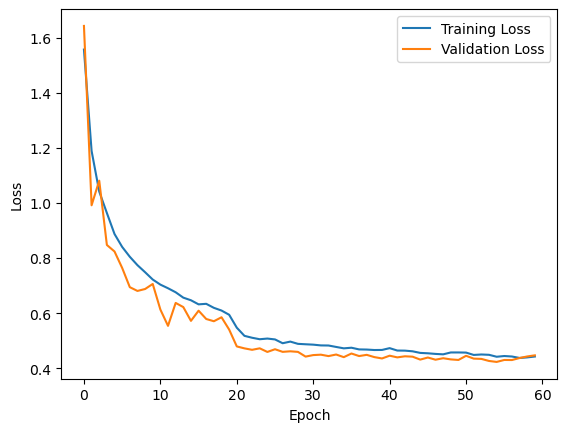

In [20]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


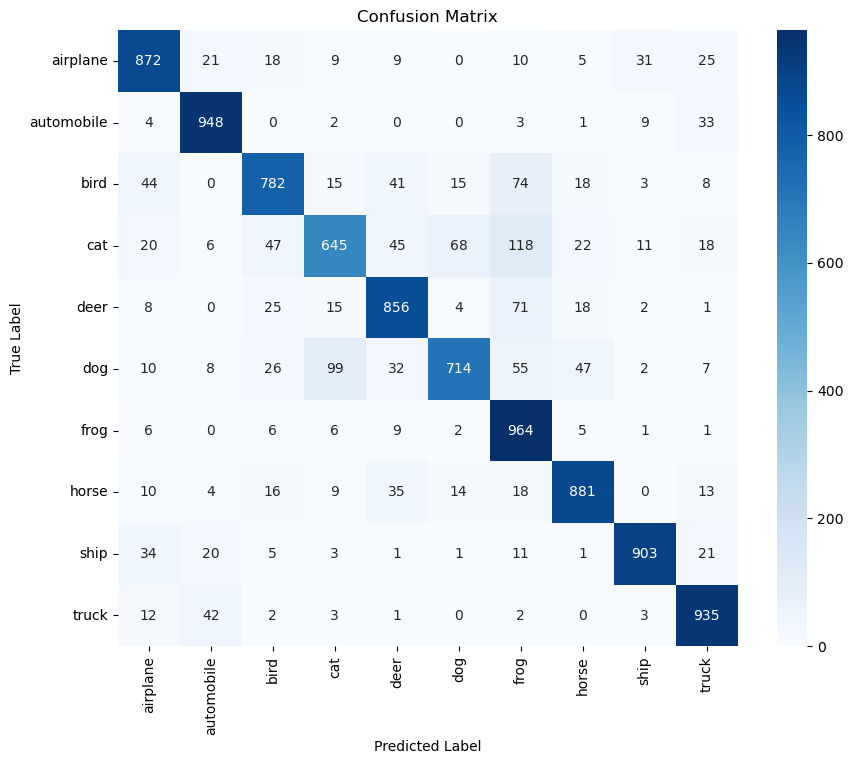

In [21]:
# Predict labels for the test set
y_pred = base_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [22]:

# Generate classification report
print(classification_report(y_test, y_pred_classes, target_names=classes))


              precision    recall  f1-score   support

    airplane       0.85      0.87      0.86      1000
  automobile       0.90      0.95      0.93      1000
        bird       0.84      0.78      0.81      1000
         cat       0.80      0.65      0.71      1000
        deer       0.83      0.86      0.84      1000
         dog       0.87      0.71      0.79      1000
        frog       0.73      0.96      0.83      1000
       horse       0.88      0.88      0.88      1000
        ship       0.94      0.90      0.92      1000
       truck       0.88      0.94      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

